# Visualize results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import numpy as np
import matplotlib.pyplot as plt

from analysis import load_configs, load_experimental_results, extract_all_runs_info, extract_run_info
logging.basicConfig(level=logging.INFO, handlers=[logging.StreamHandler()])

/usr/bin/pdflatex


In [3]:
all_configs = load_configs("tmp")
keys = ["batch_size", "lr", "mlp_lr_discount", "ffn_dim", "seed", "id"]
data = load_experimental_results(all_configs, keys, "tmp")

/checkpoint/vivc/pruning/results/tmp


In [6]:
run_info = extract_all_runs_info(data)

/usr/bin/pdflatex


In [7]:
all_configs

,vocab_size,seq_length,sparsity_index,nb_data,batch_size,nb_epochs,lr,mlp_lr_discount,emb_dim,nb_emb,ffn_dim,ffn_bias,ffn_dropout,activation,seed,save_ext,save_weights,interactive,id
0,2,12,5,2048,32,10,0.003,1.0,2,2,10,True,0,gelu,0,tmp,True,True,71f19e8922fd4a0790d685d48e48999f
1,2,12,5,2048,32,10,0.003,1.0,2,2,16,True,0,gelu,0,tmp,True,True,be5394132f094839a35221f3f4cb82a2
2,2,12,5,2048,20,10,0.003,1.0,2,2,16,True,0,gelu,0,tmp,True,True,bc7dad948b7d422aba9e2e8b8bd434f1


In [8]:
run_info

,batch_size,lr,mlp_lr_discount,ffn_dim,seed,test_acc,argmax,high
0,20,0.003,1.0,16,0,0.504883,7,0.506836
1,32,0.003,1.0,10,0,0.498535,3,0.509277
2,32,0.003,1.0,16,0,0.506348,3,0.507324


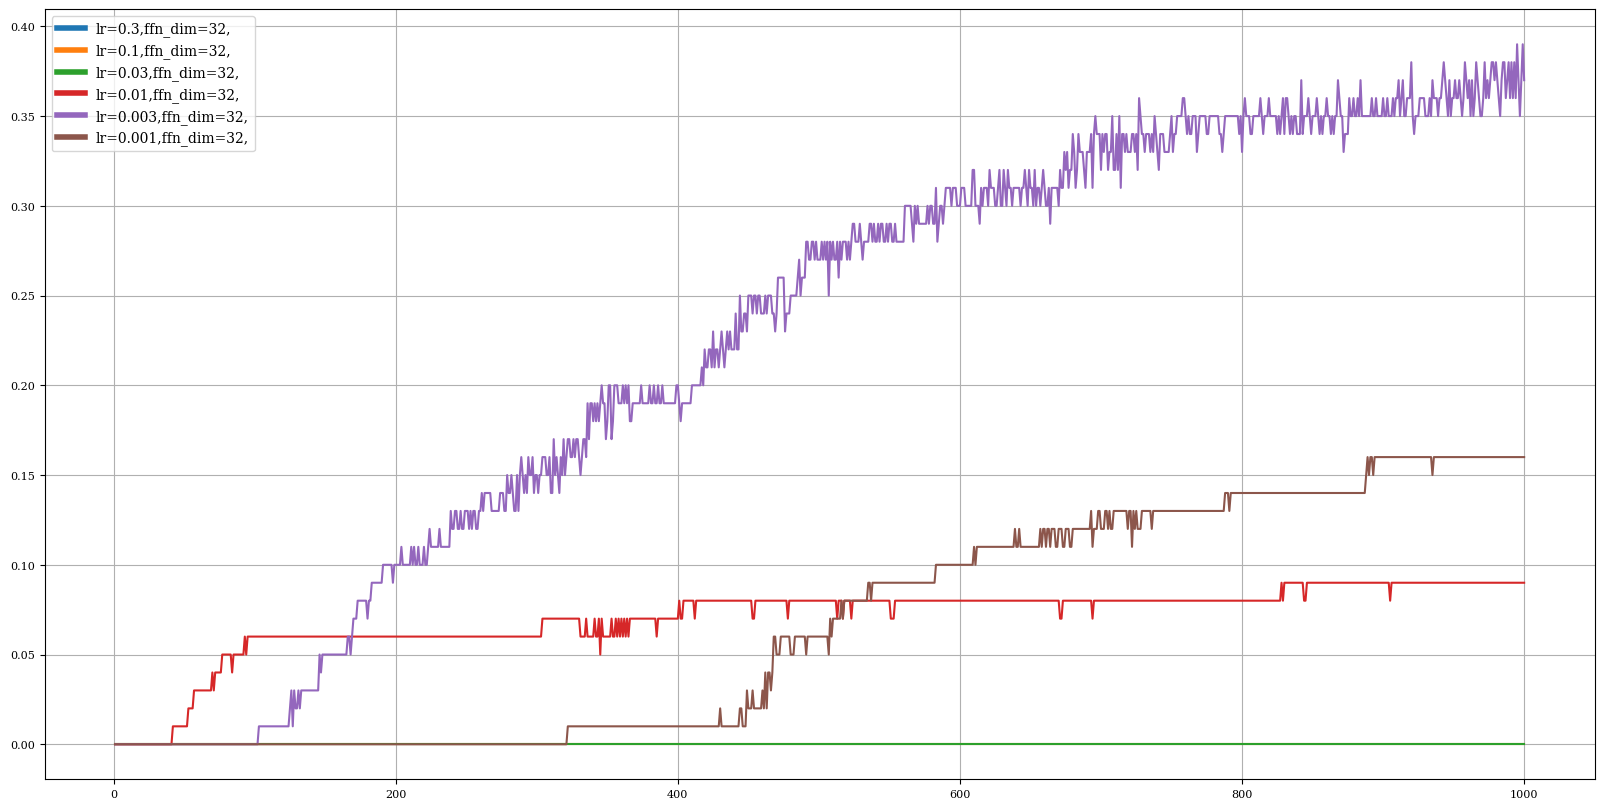

In [14]:
from itertools import product

grid_kwargs = {
    "lr": [3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3],
    # "ffn_dim": [8, 16, 32, 64, 128],
    "ffn_dim": [32],
}
# ind = "test_acc"
ind = "success"

fig, ax = plt.subplots(figsize=(20, 10))
for i, values in enumerate(product(*grid_kwargs.values())):
    kwargs = dict(zip(grid_kwargs.keys(), values))
    mean, std = extract_run_info(data, **kwargs)
    ax.plot(mean[ind], label="".join([f"{key}={value}," for key, value in kwargs.items()]))
    # ax.fill_between(mean.index, mean[ind] - std[ind], mean[ind] + std[ind], alpha=0.5)
leg = ax.legend(fontsize=10)
for line in leg.get_lines():
    line.set_linewidth(4.0)
ax.grid()


From the previous print, we see that we never overfit the train set, yet we do sometime have an accuracy collapse after having reached 100 \% accuracy.